### 특성공학
연산을 통해 새로운 칼럼을

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/Fish.csv')

In [8]:
perch_df = df.loc[df['Species']=='Perch']
perch_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [10]:
perch_full = perch_df[['Length2', 'Height', 'Width']]
perch_weight = perch_df[['Weight']]

In [12]:
perch_full.head()
# perch_weight.head()

,Length2,Height,Width
72,8.4,2.1120,1.4080
73,13.7,3.5280,1.9992
74,15.0,3.8240,2.4320
75,16.2,4.5924,2.6316
76,17.4,4.5880,2.9415


In [14]:
from sklearn.model_selection import train_test_split

In [35]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[3, 5]])
poly.transform([[3, 5]])

array([[ 3.,  5.,  9., 15., 25.]])

In [50]:
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 55)

In [44]:
# train_poly[:5]

In [46]:
# poly.get_feature_names_out()

In [51]:
test_poly = poly.transform(test_input)

In [48]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999999986

In [40]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [55]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(test_poly, test_target)

-6.867978371359287

In [57]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [59]:
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지와 랏소 선형회귀 모델인데 규제적용됨
- 릿지 : 계수의 제곱값을 기준으로 규제
      - L2 norm : 모든계수를 작게만들지만 0은되지 않음
- 랏소 : 계수의 절댓값을 기준으로 규제
      - L1 norm : 불필요한 특성의 가중치를 0으로 만듬

In [61]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9874986581266288

In [63]:
ridge.score(test_scaled, test_target)

0.9927889551449074

In [65]:
import matplotlib.pyplot as plt

In [77]:
train_score = []
test_score = []

In [78]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)

    ridge.fit(train_scaled, train_target)

    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [79]:
train_score

[0.9936373781107438,
 0.9919710686168688,
 0.9894062681307088,
 0.9874986581266288,
 0.9852371078656379,
 0.9780816712937498]

In [80]:
test_score

[0.9925507812265034,
 0.9929058393573713,
 0.9932238737654134,
 0.9927889551449074,
 0.9911373297963071,
 0.9857686318523586]

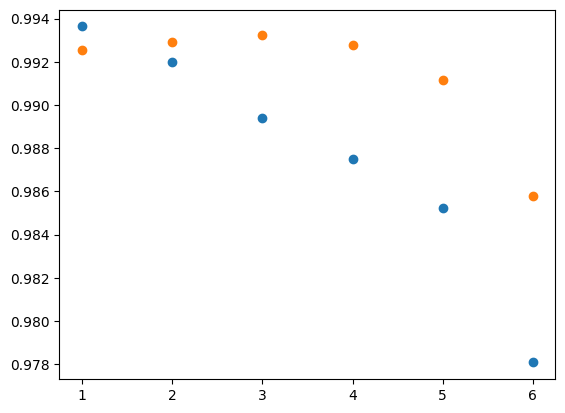

In [84]:
import numpy as np
plt.scatter(range(1,7), train_score)
plt.scatter(range(1,7), test_score)